# Momentum and Contrarian Strategy

Momentum trading involves going long (short) on an asset when its price is increasing (decreasing), i.e., going _with_ the momentum. Contrarian trading involves going _against_ the momentum, i.e., going long (short) on an asset when its price is decreasing (increasing).

In this notebook, we will apply this strategy to the EUR/USD rates.

IMPORTANT NOTE: We neglect trading costs here for simplicity. Any strategy that is to be applied in the real world should necessarily account for trading costs.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utilities as ut

### Explore data

In [19]:
ticker = "EURUSD=X"
start = "2004-01-01"
end = "2024-12-31"
df = ut.get_data(ticker, start=start, end=end)
df = ut.get_logreturns(df=df)

[*********************100%***********************]  1 of 1 completed


In [20]:
df.head()

,Price,Log Returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315


Text(0, 0.5, 'Price')

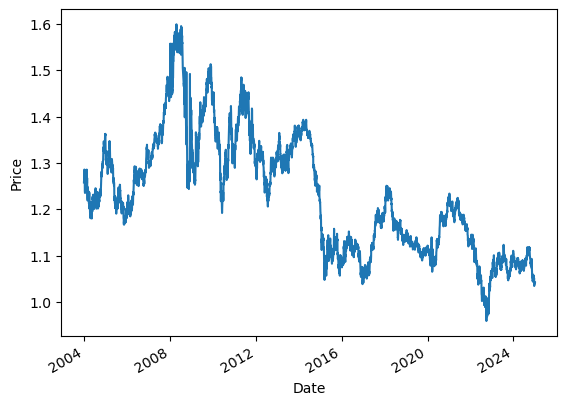

In [21]:
df["Price"].plot()
plt.ylabel("Price")

### Define momentum and contrarian strategies

In [22]:
window = 3
df["Position Momentum"] = np.sign(df["Log Returns"].rolling(window).mean())
df["Position Contrarian"] = - np.sign(df["Log Returns"].rolling(window).mean())
df.dropna(inplace=True)

### Evaluate strategies

In [23]:
# Returns
df["Returns Momentum"] = df["Position Momentum"].shift(1) * df["Log Returns"]
df["Returns Contrarian"] = df["Position Contrarian"].shift(1) * df["Log Returns"]
# Value of $1 over time
df["Wealth Momentum"] = df["Returns Momentum"].cumsum().apply(np.exp)
df["Wealth Contrarian"] = df["Returns Contrarian"].cumsum().apply(np.exp)

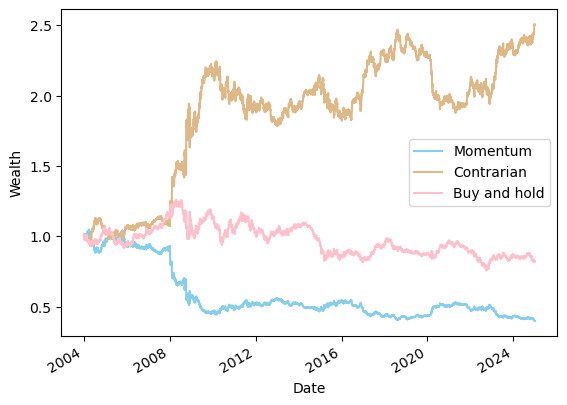

In [24]:
df["Wealth Momentum"].plot(label='Momentum',c='skyblue')
df["Wealth Contrarian"].plot(label='Contrarian',c='burlywood')
(df["Log Returns"].cumsum()).apply(np.exp).plot(label='Buy and hold', c='pink')
plt.ylabel("Wealth")
plt.legend()

Buy and hold significantly outperforms momentum trading.

### Effect of window size

[*********************100%***********************]  1 of 1 completed


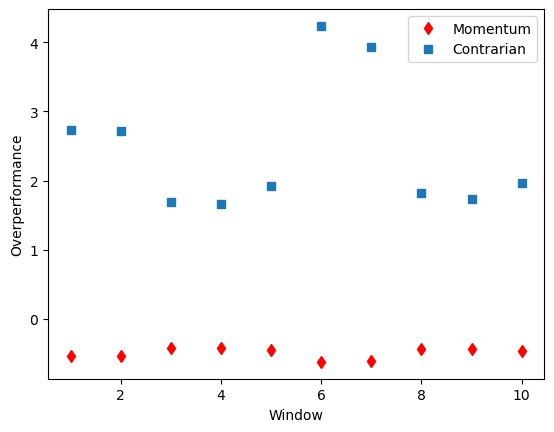

In [30]:
windows = range(1,11)
df_raw = ut.get_data(ticker, start=start, end=end)
df_raw = ut.get_logreturns(df=df_raw)

def overperformance(data, window):
    data["Position Momentum"] = np.sign(data["Log Returns"].rolling(window).mean())
    data["Position Contrarian"] = - np.sign(data["Log Returns"].rolling(window).mean())
    data.dropna(inplace=True)
    # Returns
    data["Returns Momentum"] = data["Position Momentum"].shift(1) * data["Log Returns"]
    data["Returns Contrarian"] = data["Position Contrarian"].shift(1) * data["Log Returns"]
    # Value of $1 over time
    data["Wealth Momentum"] = data["Returns Momentum"].cumsum().apply(np.exp)
    data["Wealth Contrarian"] = data["Returns Contrarian"].cumsum().apply(np.exp)
    buy_and_hold = (df["Log Returns"].cumsum()).apply(np.exp)
    return [data["Wealth Momentum"][-1] - buy_and_hold[-1], data["Wealth Contrarian"][-1] - buy_and_hold[-1]]

performance = []
for window in windows:
    performance.append(overperformance(df_raw.copy(), window))
performance = np.array(performance)

plt.plot(windows, performance[:,0], 'rd', label='Momentum')
plt.plot(windows, performance[:,1], 's', label='Contrarian')
plt.xlabel("Window")
plt.ylabel("Overperformance")
plt.legend()